# We are going to use Machine Learning to predict sales based on past information of marketing spending and its relationship to past sales

![Image of business](https://travel.state.gov/content/travel/en/us-visas/business/_jcr_content/tsg-rwd-content-page-parsysxxx/slideshow.img.png/1512148994695.png)

In [1]:
#importing necessary modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Setting up the dataframe
data = pd.read_csv('Advertising.csv', index_col = 0) #index col = 0 takes the first left column as index
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
#As we can see we have a dataset of 200 rows and 4 columns. 
#We consider the first 3 columns as features, and the 4th one, "Sales" as the response column
data.shape

(200, 4)

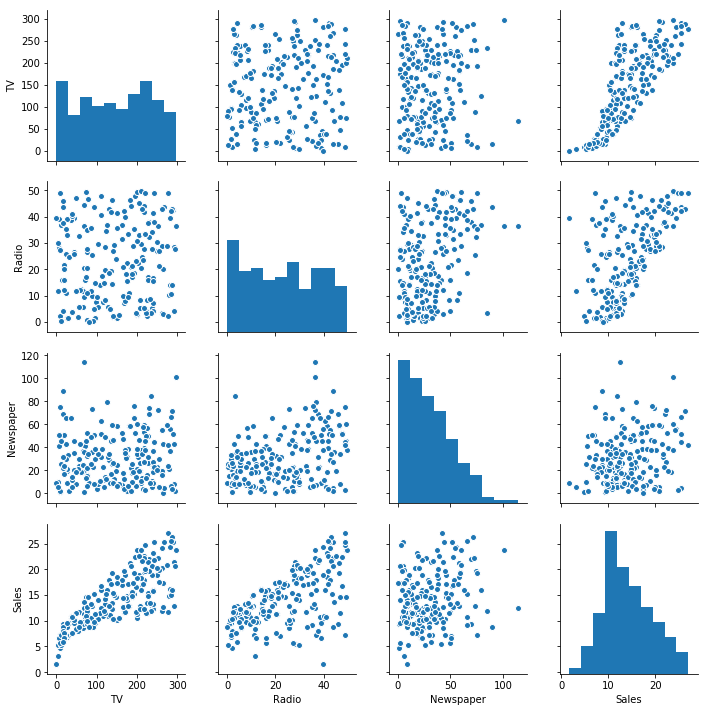

In [3]:
import seaborn as sns
sns.pairplot(data = data)

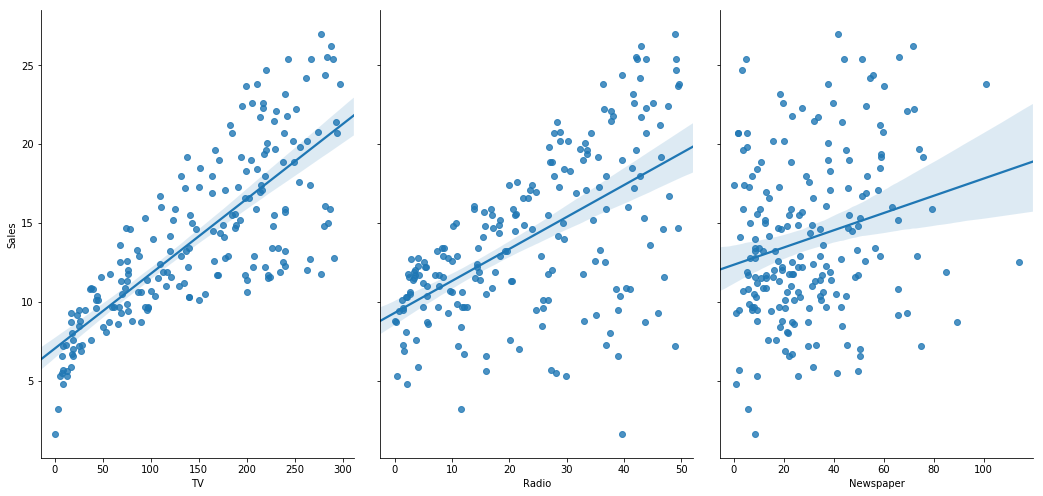

In [4]:
#visualize the relationship between the features and the response using scatterplots
#kind = 'reg' plots the linear regresssion line and the 95% confidence band
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind = 'reg')


## Because there appears to be a great linear relationship between features and response, this is a great candidate for the Linear Regression method

# Preparing X and using Pandas

In [5]:
feature_cols = ['TV', 'Radio', 'Newspaper']
# We set up our features cols as X
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [6]:
#We check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [7]:
# Now we select the column corresponding to y
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [8]:
#we check the type and shape to make sure everything is in the correct format
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


# Splitting X and y into training and testing sets 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [10]:
#We check the shape of each part we have split
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [11]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate the model
linreg = LinearRegression()

#fit model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Interpreting model coefficients

In [12]:
#print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179335
[0.04656457 0.17915812 0.00345046]


In [13]:
#pair the feature names with the coefficients
for el, feature in zip(feature_cols, linreg.coef_):
    print(el, feature)

TV 0.04656456787415029
Radio 0.1791581224508883
Newspaper 0.0034504647111804343


In [14]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

## Computing the RMSE for our Sales predictions

In [15]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.4046514230328955

## Does "Newspaper" belong in our model? What would happen if we remove it and check the RMSE?

In [16]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



1.3879034699382888


## The RMSE decreased when we removed "Newspaper" from the model, which is a good sign, since the lower the RMSE, the better